In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [13]:
# reading data

file = 'Nashville_Housing_Data_Cleaned.xlsx'
cols = [2, 5, 6, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
df = pd.read_excel(file, usecols=cols).dropna()
#sale_price = df.pop("Sale Price")

In [14]:
print(df.head())

        Land Use Property City  Sale Price  Acreage  Neighborhood  Land Value  \
1  SINGLE FAMILY     NASHVILLE      191500     0.17        3127.0     32000.0   
2  SINGLE FAMILY     NASHVILLE      202000     0.11        9126.0     34000.0   
3  SINGLE FAMILY     NASHVILLE       32000     0.17        3130.0     25000.0   
4  SINGLE FAMILY     NASHVILLE      102000     0.34        3130.0     25000.0   
5  SINGLE FAMILY     NASHVILLE       93736     0.17        3130.0     25000.0   

   Building Value  Total Value  Finished Area Foundation Type  Year Built  \
1        134400.0     168300.0     1149.00000         PT BSMT      1941.0   
2        157800.0     191800.0     2090.82495            SLAB      2000.0   
3        243700.0     268700.0     2145.60001       FULL BSMT      1948.0   
4        138100.0     164800.0     1969.00000           CRAWL      1910.0   
5         86100.0     113300.0     1037.00000           CRAWL      1945.0   

  Exterior Wall Grade  Bedrooms  Full Bath  Half B

In [15]:
# split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2)

# extract the numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=np.number).columns
categorical_cols = train_df.select_dtypes(exclude=np.number).columns

# scale the numerical data
scaler = MinMaxScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# one-hot encode the categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
train_df = pd.concat([train_df, pd.DataFrame(encoder.fit_transform(train_df[categorical_cols]).toarray())], axis=1)
train_df.drop(categorical_cols, axis=1, inplace=True)
train_df.dropna(how='any', inplace=True)
test_df = pd.concat([test_df, pd.DataFrame(encoder.transform(test_df[categorical_cols]).toarray())], axis=1)
test_df.drop(categorical_cols, axis=1, inplace=True)
test_df.dropna(how='any', inplace=True)


In [16]:
print(train_df.shape, "\n", test_df.shape)

(6566, 75) 
 (482, 75)


In [17]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(train_df.shape[1],)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(train_df, train_df["Sale Price"], epochs=25, batch_size=32, validation_split=0.2)
test_loss = model.evaluate(test_df, test_df["Sale Price"])

# Make predictions
predictions = model.predict(test_df)

Epoch 1/25
165/165 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 2/25
165/165 [==============================] - 0s 1ms/step - loss: 7.0177e-04 - val_loss: 8.2550e-04
Epoch 3/25
165/165 [==============================] - 0s 1ms/step - loss: 4.9228e-04 - val_loss: 8.5772e-04
Epoch 4/25
165/165 [==============================] - 0s 1ms/step - loss: 4.1683e-04 - val_loss: 5.9987e-04
Epoch 5/25
165/165 [==============================] - 0s 1ms/step - loss: 3.1590e-04 - val_loss: 6.1103e-04
Epoch 6/25
165/165 [==============================] - 0s 1ms/step - loss: 2.7227e-04 - val_loss: 4.3913e-04
Epoch 7/25
165/165 [==============================] - 0s 1ms/step - loss: 2.1400e-04 - val_loss: 3.8008e-04
Epoch 8/25
165/165 [==============================] - 0s 1ms/step - loss: 1.7306e-04 - val_loss: 2.9848e-04
Epoch 9/25
165/165 [==============================] - 0s 1ms/step - loss: 1.4512e-04 - val_loss: 2.4924e-04
Epoch 10/25
165/165 [===============

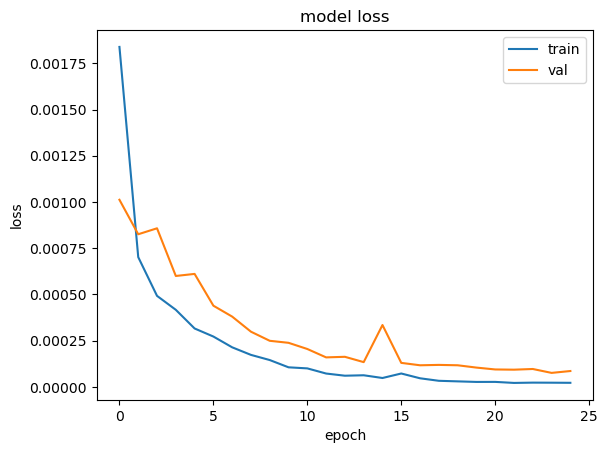

In [19]:
# plotting lossimport matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


In [20]:
print(predictions[:1])


[[0.01103806]]
